In [1]:
%run ../src/parse_mails.py
import matplotlib.pyplot as plt

df = parse_maildir("../data/maildir")
df

,name,date,parsed_date,time,day,tz
../data/maildir/tycholiz-b/sent_items/155.,tycholiz-b,"Date: Fri, 12 Oct 2001 10:57:02 -0700 (PDT)\n",2001-10-12 10:57:02-07:00,10:57:02,2001-10-12,PDT
../data/maildir/tycholiz-b/sent_items/113.,tycholiz-b,"Date: Fri, 28 Sep 2001 09:36:02 -0700 (PDT)\n",2001-09-28 09:36:02-07:00,09:36:02,2001-09-28,PDT
../data/maildir/tycholiz-b/sent_items/408.,tycholiz-b,"Date: Tue, 6 Nov 2001 07:13:09 -0800 (PST)\n",2001-11-06 07:13:09-08:00,07:13:09,2001-11-06,PST
../data/maildir/tycholiz-b/sent_items/247.,tycholiz-b,"Date: Fri, 30 Nov 2001 07:57:29 -0800 (PST)\n",2001-11-30 07:57:29-08:00,07:57:29,2001-11-30,PST
../data/maildir/tycholiz-b/sent_items/216.,tycholiz-b,"Date: Fri, 26 Oct 2001 10:49:36 -0700 (PDT)\n",2001-10-26 10:49:36-07:00,10:49:36,2001-10-26,PDT
...,...,...,...,...,...,...
../data/maildir/dickson-s/sent/85.,dickson-s,"Date: Wed, 11 Apr 2001 04:29:00 -0700 (PDT)\n",2001-04-11 04:29:00-07:00,04:29:00,2001-04-11,PDT
../data/maildir/dickson-s/sent/3.,dickson-s,"Date: Fri, 9 Mar 2001 01:50:00 -0800 (PST)\n",2001-03-09 01:50:00-08:00,01:50:00,2001-03-09,PST
../data/maildir/dickson-s/sent/81.,dickson-s,"Date: Wed, 11 Apr 2001 02:29:00 -0700 (PDT)\n",2001-04-11 02:29:00-07:00,02:29:00,2001-04-11,PDT
../data/maildir/dickson-s/sent/38.,dickson-s,"Date: Wed, 28 Mar 2001 03:57:00 -0800 (PST)\n",2001-03-28 03:57:00-08:00,03:57:00,2001-03-28,PST


In [3]:
df["seconds_since_midnight"] = df["time"].apply(lambda x: x.hour * 60 * 60 + x.minute * 60 + x.second)
grouped_times = df.groupby("name")["seconds_since_midnight"].apply(list).reset_index()
grouped_times

,name,seconds_since_midnight
0,allen-p,"[48769, 27749, 25375, 20145, 48830, 43647, 195..."
1,arnold-j,"[51927, 23410, 17891, 66000, 35600, 23188, 175..."
2,arora-h,"[23656, 43893, 30997, 28774, 44945, 34114, 452..."
3,badeer-r,"[30223, 32348, 32204, 32922, 32955, 32319, 328..."
4,bailey-s,"[35322, 34236, 47856, 22714, 48862, 47706, 275..."
...,...,...
143,williams-w3,"[55894, 58104, 65293, 72854, 45427, 64645, 447..."
144,wolfe-j,"[49958, 47650, 34647, 41298, 34124, 43454, 463..."
145,ybarbo-p,"[35093, 55380, 72540, 43180, 55220, 34090, 531..."
146,zipper-a,"[26865, 32966, 21469, 24685, 27963, 39630, 467..."


In [7]:
def center_array(a):
    mean = a.mean()
    center_element = lambda x: x - mean
    return center_element(a)
    
grouped_times["centered_seconds"] = grouped_times["seconds_since_midnight"].apply(lambda x: center_array(np.array(x)))
grouped_times

,name,seconds_since_midnight,centered_seconds
0,allen-p,"[48769, 27749, 25375, 20145, 48830, 43647, 195...","[21463.326043737576, 443.3260437375757, -1930...."
1,arnold-j,"[51927, 23410, 17891, 66000, 35600, 23188, 175...","[19029.47216319592, -9487.527836804082, -15006..."
2,arora-h,"[23656, 43893, 30997, 28774, 44945, 34114, 452...","[-14246.259740259738, 5990.7402597402615, -690..."
3,badeer-r,"[30223, 32348, 32204, 32922, 32955, 32319, 328...","[4563.169491525423, 6688.169491525423, 6544.16..."
4,bailey-s,"[35322, 34236, 47856, 22714, 48862, 47706, 275...","[-2282.7142857142826, -3368.7142857142826, 102..."
...,...,...,...
143,williams-w3,"[55894, 58104, 65293, 72854, 45427, 64645, 447...","[2693.1599229287094, 4903.159922928709, 12092...."
144,wolfe-j,"[49958, 47650, 34647, 41298, 34124, 43454, 463...","[8113.032258064515, 5805.032258064515, -7197.9..."
145,ybarbo-p,"[35093, 55380, 72540, 43180, 55220, 34090, 531...","[-12455.06923076923, 7831.93076923077, 24991.9..."
146,zipper-a,"[26865, 32966, 21469, 24685, 27963, 39630, 467...","[-8834.442857142858, -2733.442857142858, -1423..."


In [8]:
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator

In [9]:
times = grouped_times["centered_seconds"].to_numpy()
names = grouped_times["name"].to_numpy()

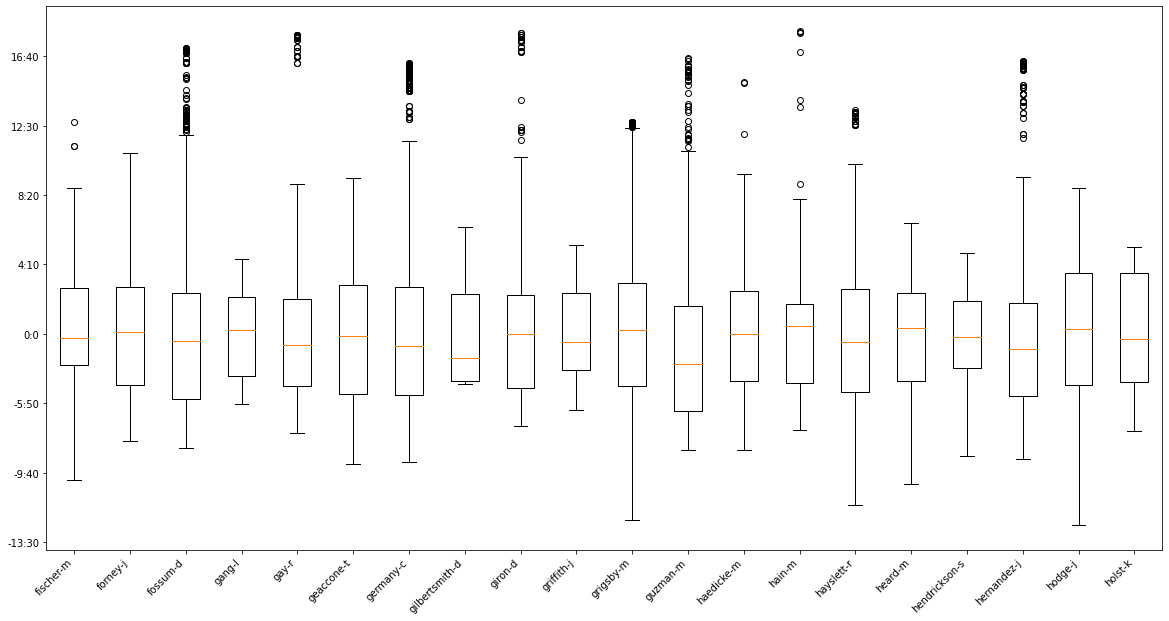

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
m = 30
n = 50
axs.boxplot(times[m:n], labels=names[m:n])

plt.locator_params(axis='y', nbins=6)

def seconds_in_time(x, pos):
    hours = x // 3600
    minutes = (x - (hours * 3600)) // 60
    return '%d:%d' % (hours, minutes)

formatter = FuncFormatter(seconds_in_time)

axs.yaxis.set_major_locator(MaxNLocator(10))
axs.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha="right")

plt.show()